# Introduction to Simple Linear Regression

In this very simple example, we'll explore how to create a very simple fit line, the classic case of y=mx+b. We'll go carefully through each step, so you can see what type of question a simple fit line can answer. Keep in mind, this case is very simplified and is not the approach we'll take later on, its just here to get you thinking about linear regression in perhaps the same way [Galton](https://en.wikipedia.org/wiki/Francis_Galton) did.

## Imports

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [58]:
df = pd.read_csv("advertising.csv")

In [59]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Is there a relationship between *total* advertising spend and *sales*?**

In [61]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

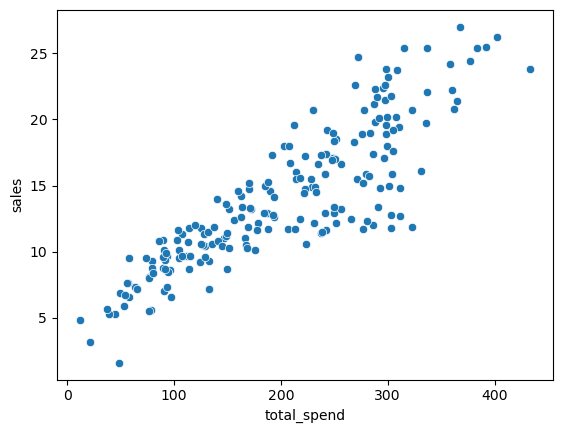

In [62]:
sns.scatterplot(x='total_spend',y='sales',data = df)

## Least Squares Line

Full formulas available on Wikipedia: https://en.wikipedia.org/wiki/Linear_regression ,as well as in ISLR reading.

**Understanding what a line of best fit answers.**
If someone was to spend a total of $200 , what would the expected sales be? We have simplified this quite a bit by combining all the features into "total spend", but we will come back to individual features later on. For now, let's focus on understanding what a linear regression line can help answer.

**Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

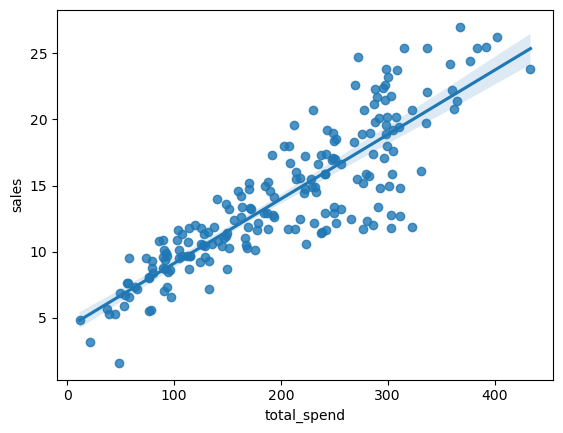

In [63]:
sns.regplot(x='total_spend',y='sales',data = df)

Let's go ahead and start solving: $$y=mx+b$$

Simply solve for m and b, remember, that as shown in the video, we are solving in a generalized form:

$$ \hat{y} = \beta_0 + \beta_1X$$

Capitalized to signal that we are dealing with a matrix of values, we have a known matrix of labels (sales numbers) Y and a known matrix of total_spend (X). We are going to solve for the *beta* coefficients, which as we expand to more than just a single feature, will be important to build an understanding of what features have the most predictive power. We use y hat to indicate that y hat is a prediction or estimation, y would be a true label/known value.

We can use NumPy for this (if you really wanted to, you could solve this by [hand](https://towardsdatascience.com/linear-regression-by-hand-ee7fe5a751bf))

In [64]:
X = df['total_spend']
y = df['sales']

In [67]:
help(np.polynomial)

Help on package numpy.polynomial in numpy:

NAME
    numpy.polynomial - A sub-package for efficiently dealing with polynomials.

DESCRIPTION
    Within the documentation for this sub-package, a "finite power series,"
    i.e., a polynomial (also referred to simply as a "series") is represented
    by a 1-D numpy array of the polynomial's coefficients, ordered from lowest
    order term to highest.  For example, array([1,2,3]) represents
    ``P_0 + 2*P_1 + 3*P_2``, where P_n is the n-th order basis polynomial
    applicable to the specific module in question, e.g., `polynomial` (which
    "wraps" the "standard" basis) or `chebyshev`.  For optimal performance,
    all operations on polynomials, including evaluation at an argument, are
    implemented as operations on the coefficients.  Additional (module-specific)
    information can be found in the docstring for the module of interest.
    
    This package provides *convenience classes* for each of six different kinds
    of polynomia

In [79]:
# Returns highest order coef first!
beta = np.polyfit(X,y,1)
beta

array([0.04868788, 4.24302822])

In [72]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,101)
potential_spend


array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
       110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
       165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
       220., 225., 230., 235., 240., 245., 250., 255., 260., 265., 270.,
       275., 280., 285., 290., 295., 300., 305., 310., 315., 320., 325.,
       330., 335., 340., 345., 350., 355., 360., 365., 370., 375., 380.,
       385., 390., 395., 400., 405., 410., 415., 420., 425., 430., 435.,
       440., 445., 450., 455., 460., 465., 470., 475., 480., 485., 490.,
       495., 500.])

In [80]:
potential_sales = beta[0] * potential_spend + beta[1]
potential_sales

array([ 4.24302822,  4.48646761,  4.72990701,  4.97334641,  5.2167858 ,
        5.4602252 ,  5.7036646 ,  5.94710399,  6.19054339,  6.43398279,
        6.67742218,  6.92086158,  7.16430098,  7.40774037,  7.65117977,
        7.89461916,  8.13805856,  8.38149796,  8.62493735,  8.86837675,
        9.11181615,  9.35525554,  9.59869494,  9.84213434, 10.08557373,
       10.32901313, 10.57245253, 10.81589192, 11.05933132, 11.30277072,
       11.54621011, 11.78964951, 12.03308891, 12.2765283 , 12.5199677 ,
       12.7634071 , 13.00684649, 13.25028589, 13.49372529, 13.73716468,
       13.98060408, 14.22404348, 14.46748287, 14.71092227, 14.95436167,
       15.19780106, 15.44124046, 15.68467986, 15.92811925, 16.17155865,
       16.41499805, 16.65843744, 16.90187684, 17.14531624, 17.38875563,
       17.63219503, 17.87563443, 18.11907382, 18.36251322, 18.60595262,
       18.84939201, 19.09283141, 19.3362708 , 19.5797102 , 19.8231496 ,
       20.06658899, 20.31002839, 20.55346779, 20.79690718, 21.04

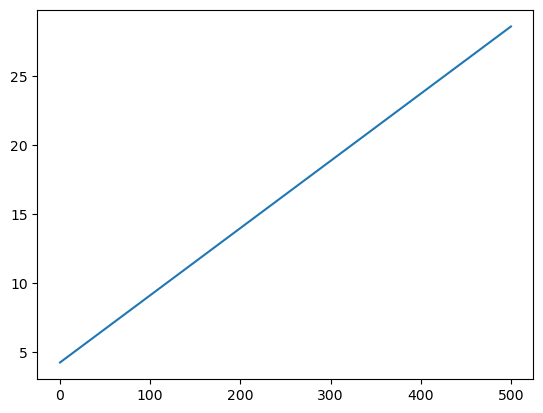

In [75]:
plt.plot(potential_spend,potential_sales)

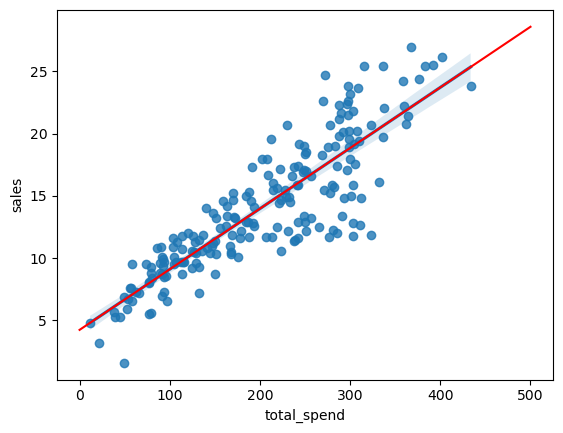

In [77]:
sns.regplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,potential_sales,color='red')

**Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

In [81]:
spend = 200
predicated_sales = beta[0] * spend + beta[1]

In [82]:
predicted_sales

13.98060422

# Further considerations...which we will explore in much more depth!

## Overfitting, Underfitting, and Measuring Performance

Notice we fit to order=1 , essentially a straight line, we can begin to explore higher orders, but does higher order mean an overall better fit? Is it possible to fit too much? Too little? How would we know and how do we even define a good fit?

In [92]:
beta1 = np.polyfit(X,y,3)
beta1

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [93]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,101)
potential_spend

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
       110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
       165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
       220., 225., 230., 235., 240., 245., 250., 255., 260., 265., 270.,
       275., 280., 285., 290., 295., 300., 305., 310., 315., 320., 325.,
       330., 335., 340., 345., 350., 355., 360., 365., 370., 375., 380.,
       385., 390., 395., 400., 405., 410., 415., 420., 425., 430., 435.,
       440., 445., 450., 455., 460., 465., 470., 475., 480., 485., 490.,
       495., 500.])

In [99]:
potential_sales = beta1[0] * potential_spend**3 +beta1[1] * potential_spend**2  + beta1[2]  * potential_spend + beta1[3]
potential_sales

array([ 2.70495053,  3.11069732,  3.5072052 ,  3.89470488,  4.27342707,
        4.64360249,  5.00546183,  5.35923583,  5.70515518,  6.0434506 ,
        6.37435279,  6.69809248,  7.01490037,  7.32500717,  7.6286436 ,
        7.92604036,  8.21742817,  8.50303773,  8.78309977,  9.05784498,
        9.32750409,  9.5923078 ,  9.85248682, 10.10827187, 10.35989366,
       10.6075829 , 10.85157029, 11.09208655, 11.3293624 , 11.56362854,
       11.79511569, 12.02405455, 12.25067583, 12.47521026, 12.69788854,
       12.91894137, 13.13859948, 13.35709357, 13.57465436, 13.79151255,
       14.00789886, 14.224044  , 14.44017868, 14.65653361, 14.8733395 ,
       15.09082707, 15.30922702, 15.52877006, 15.74968692, 15.97220829,
       16.19656489, 16.42298743, 16.65170663, 16.88295319, 17.11695783,
       17.35395125, 17.59416417, 17.8378273 , 18.08517134, 18.33642702,
       18.59182505, 18.85159612, 19.11597096, 19.38518028, 19.65945479,
       19.93902519, 20.22412221, 20.51497655, 20.81181892, 21.11

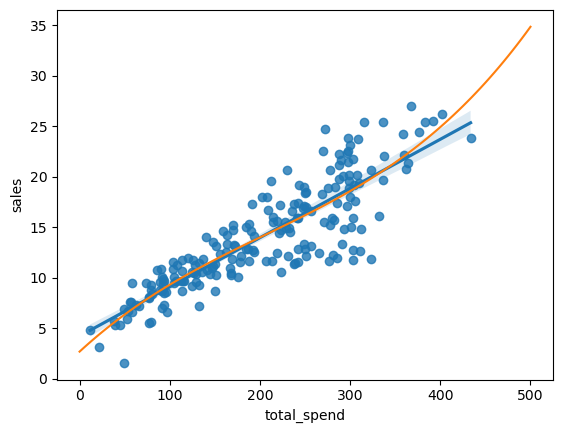

In [100]:
sns.regplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,potential_sales)

**Is this better than our straight line fit? What are good ways of measuring this?**

## Multiple Features

The real data had 3 features, not everything in total spend, this would allow us to repeat the process and maybe get a more accurate result?

In [101]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [102]:
# Note here we're passing in 3 which matches up with 3 unique features, so we're not polynomial yet
np.polyfit(X,y,3)

TypeError: expected 1D vector for x

**Uh oh! Polyfit only works with a 1D X array! We'll need to move on to a more powerful library...**

-------
--------